# TP FINAL - Grupo 9 - CLUSTERING: KMEANS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

### Importación y Visualización de Datos

In [2]:
data=pd.read_csv('./Data/All.csv')

In [3]:
data.sample(2)

,hash,pais,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
410,02aef51b7108d35e006334cfb11efdb246138d0b,Brasil,1873002,0,exe,1,0,2,32,0,7,4,0,8,869,0
1370,f245b2b10aeaa0eabb1d416032e340a86067e58d,Chile,294924,0,dll-msil,1,0,0,1,0,7,3,3,4,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   hash                                    2509 non-null   object
 1   pais                                    2509 non-null   object
 2   fs_size                                 2509 non-null   int64 
 3   raw_size                                2509 non-null   int64 
 4   file_extension                          2509 non-null   object
 5   cantidad_procesos                       2509 non-null   int64 
 6   cantidad_procesos_red                   2509 non-null   int64 
 7   cantidad_objetos                        2509 non-null   int64 
 8   cantidad_DLLs                           2509 non-null   int64 
 9   cantidad_acciones_registros             2509 non-null   int64 
 10  ATTEMPT_TO_COPY_ITSELF                  2509 non-null   int64 
 11  ATTE

### Creación de Dummies

In [5]:
categoricals = ['pais', 'file_extension']
Xc = data[categoricals]
dummies_df = pd.get_dummies(Xc, drop_first = True)
dummies_df.head(3)

,pais_Brasil,pais_Chile,pais_Colombia,pais_Guatemala,pais_Mexico,pais_Peru,file_extension_dll-bho,file_extension_dll-msil,file_extension_dll-svc,file_extension_exe,file_extension_generic,file_extension_gif,file_extension_jar,file_extension_lnk,file_extension_msi,file_extension_vbs,file_extension_xml
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Estandarización de Variables

In [6]:
numericals = ['fs_size', 'raw_size','cantidad_procesos', 'cantidad_procesos_red', 'cantidad_objetos', 'cantidad_DLLs', 'cantidad_acciones_registros','ATTEMPT_TO_COPY_ITSELF','ATTEMPT_TO_EXECUTE_AFTER_RENAME','VBA_ATTEMPT_TO_CALL_API','IMAGE_HAS_SHARED_MEMORY_SECTION','HEUR_APPLICATION_CONTAINS_RUNTIME_DATA','INTERNAL_HAS_JAVA_CLASS_EXTRACT']
Xn = data[numericals]




scaler = StandardScaler()
scaler.fit(Xn)

std_numerical_data = scaler.transform(Xn)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,fs_size_std,raw_size_std,cantidad_procesos_std,cantidad_procesos_red_std,cantidad_objetos_std,cantidad_DLLs_std,cantidad_acciones_registros_std,ATTEMPT_TO_COPY_ITSELF_std,ATTEMPT_TO_EXECUTE_AFTER_RENAME_std,VBA_ATTEMPT_TO_CALL_API_std,IMAGE_HAS_SHARED_MEMORY_SECTION_std,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA_std,INTERNAL_HAS_JAVA_CLASS_EXTRACT_std
0,-0.424618,-0.315240,-0.255187,-0.154903,-0.339658,-0.143787,-0.340738,0.014565,1.172297,1.152581,-1.144035,1.060070,-0.565299
1,-0.100327,-0.161470,0.849988,-0.048598,1.061619,0.325028,-0.270136,-1.540505,0.391284,0.766387,-1.528805,0.571862,2.687763
2,-0.473024,-0.315240,-0.377984,-0.154903,-0.610873,-0.238934,-0.340738,1.569636,1.562803,0.380192,-0.759265,1.075520,0.828870
3,-0.474924,-0.315240,-0.377984,-0.154903,-0.610873,-0.238934,-0.340738,0.792100,0.391284,-0.778393,-0.759265,-0.778436,-0.565299
4,-0.316161,-0.315240,0.113204,-0.154903,0.067164,0.037857,0.123219,-1.540505,1.172297,0.766387,-1.528805,0.676919,-0.565299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0.559647,-0.315240,5.270686,0.004555,-0.204051,1.772992,1.030963,-1.151737,0.781791,0.380192,1.164585,-0.778436,-0.565299
2505,-0.320517,-0.315240,-0.255187,-0.154903,-0.610873,-0.154167,-0.340738,-0.374202,0.781791,0.380192,-1.528805,-0.778436,0.828870
2506,-0.390831,-0.289032,-0.377984,-0.154903,-0.520468,-0.178386,-0.340738,-1.540505,0.781791,0.380192,1.549355,-0.778436,-0.565299
2507,-0.474924,-0.315240,-0.377984,-0.154903,-0.610873,-0.238934,-0.340738,-1.151737,-1.170740,-0.392198,0.779815,-0.778436,-0.565299


In [7]:
X = pd.concat([dummies_df, std_df], axis = 1)

In [8]:
X.head(3)

,pais_Brasil,pais_Chile,pais_Colombia,pais_Guatemala,pais_Mexico,pais_Peru,file_extension_dll-bho,file_extension_dll-msil,file_extension_dll-svc,file_extension_exe,...,cantidad_procesos_red_std,cantidad_objetos_std,cantidad_DLLs_std,cantidad_acciones_registros_std,ATTEMPT_TO_COPY_ITSELF_std,ATTEMPT_TO_EXECUTE_AFTER_RENAME_std,VBA_ATTEMPT_TO_CALL_API_std,IMAGE_HAS_SHARED_MEMORY_SECTION_std,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA_std,INTERNAL_HAS_JAVA_CLASS_EXTRACT_std
0,0,0,0,0,0,0,0,0,0,1,...,-0.154903,-0.339658,-0.143787,-0.340738,0.014565,1.172297,1.152581,-1.144035,1.060070,-0.565299
1,0,0,0,0,0,0,0,0,0,1,...,-0.048598,1.061619,0.325028,-0.270136,-1.540505,0.391284,0.766387,-1.528805,0.571862,2.687763
2,0,0,0,0,0,0,0,1,0,0,...,-0.154903,-0.610873,-0.238934,-0.340738,1.569636,1.562803,0.380192,-0.759265,1.075520,0.828870


### Clustering utilizando KMeans

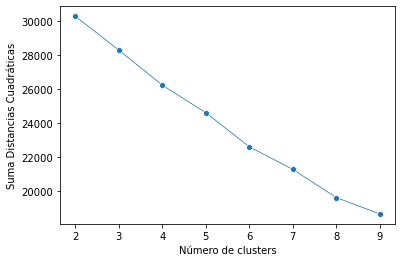

In [9]:
#Vemos cómo varia la suma de distancias cuadráticas con el número de clusters para identificar el k óptimo

sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

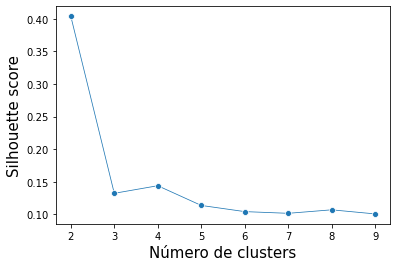

In [10]:
#Vemos que los puntos se encuentran muy espaciados entre sí lo cual no nos permite establecer un k optimo 

#Calculamos el silhouette score para ver si con este método logramos identificar un k óptimo

from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

In [11]:
#Del análisis del Silhouette score se desprende que el número óptimo de clusters es 2

kmeans=KMeans(n_clusters=2,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

In [12]:
etiquetas = pd.DataFrame(labels)
etiquetas.value_counts()

0    2253
1     256
dtype: int64

#### Armamos un data set con cada uno de los clusters identificados

In [13]:
etiquetas.value_counts()

0    2253
1     256
dtype: int64

- Cluster 0

In [14]:
mask_0 = labels == 0
filas_cluster_0 = etiquetas[mask_0].index.tolist()
cluster_0 = data.iloc[filas_cluster_0, :]
cluster_0 = cluster_0.reset_index()
cluster_0.index

RangeIndex(start=0, stop=2253, step=1)

- Cluster 1

In [15]:
mask_1 = labels == 1
filas_cluster_1 = etiquetas[mask_1].index.tolist()
cluster_1 = data.iloc[filas_cluster_1, :]
cluster_1 = cluster_1.reset_index()
cluster_1.index

RangeIndex(start=0, stop=256, step=1)

##### Guardamos los clusters en archivos diferentes

In [16]:
cluster_0.to_csv('./Data/cluster_0.csv')
cluster_1.to_csv('./Data/cluster_1.csv')